<h1>Quantium Virtual Internship - Retail Strategy and Analytics - Task 1</h1>

<h2>Objective:</h2>
<p>The primary objective is to analyze customer transaction data to better understand the purchasing behavior of customers who buy chips. This analysis will aid in identifying key customer segments, understanding sales drivers, and providing actionable insights that will contribute to the supermarket's strategic planning for the chip category over the next six months.</p>

<h2>Problem Statement:</h2>
<p>The client, a Category Manager for Chips, seeks to understand the types of customers purchasing chips and their behavior within a specific region. This understanding will help in optimizing product offerings, marketing strategies, and inventory management to maximize sales and customer satisfaction.</p>

<h2>Variables:</h2>
<ul>
<li>DATE: The date of the transaction </li>
<li>STORE_NBR: Store number where the transaction occurred </li>
<li>LYLTY_CARD_NBR: Loyalty card number of the customer </li>
<li>TXN_ID: Transaction ID </li>
<li>PROD_NBR: Product number</li>
<li>PROD_NAME: Product name</li>
<li>PROD_QTY: Quantity of the product purchased</li>
<li>TOT_SALES: Total sales amount for the transaction</li>
</ul>

<h2>Customer Segments:</h2>
<ul>
<li>LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
</li>
<li>
PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.</li>
</ul>




In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings('error')

<h4>Data Import and Initial Inspection</h4>

In [189]:

transaction_data = pd.read_excel("transaction_data.xlsx")
customer_data = pd.read_csv("purchase_behaviour.csv")

<h4>Data Structure and Summary</h4>

In [190]:

print(f'Number of rows for the customer data is {customer_data.shape[0]}')
print(f'Number of columns for the customer data is {customer_data.shape[1]}')

Number of rows for the customer data is 72637
Number of columns for the customer data is 3


In [191]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [192]:
print(f'The number of rows for transactional data is {transaction_data.shape[0]}')
print(f'The number of columns for transactional data is {transaction_data.shape[1]}')

The number of rows for transactional data is 264836
The number of columns for transactional data is 8


In [193]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


<p>The datasets for transactions and customer behavior are imported successfully. Initial inspection of these datasets is crucial to ensure they are loaded correctly and to understand their structure. The transaction_data contains 8 columns, and customer_data has 3 columns, each providing essential information for the analysis.</p>

<p>The data structure reveals that the customer_data has 72,637 rows and 3 columns, while the transaction_data has 264,836 rows and 8 columns. Both datasets contain a significant amount of data, which will help provide comprehensive insights. No missing values are detected, suggesting a clean dataset that is ready for further analysis.</p>

<h4>Date Conversion</h4>

In [194]:
# The numbers you see in the transactional date (43390, 43599, 43605, etc.) are the number of days since the origin date (December 30, 1899)
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

<p>The date column in the transaction_data is successfully converted from its original numeric format, which represented days since a base date (December 30, 1899), into a standard datetime format. This step is vital as it enables temporal analysis of transactions, such as identifying trends over time.</p>

We should check that we are looking at the right products by examining PROD_NAME

<h4>Text analysis </h4>

In [195]:
transaction_data['PROD_NAME'].value_counts().head(20)

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Name: coun

In [196]:
product_words = pd.Series(' '.join(transaction_data['PROD_NAME'].unique()).split()).value_counts()


 Examine the words in PROD_NAME to see if there are any incorrect entries 
such as products that are not chips

In [197]:
product_words = product_words[~product_words.index.str.contains(r'[^a-zA-Z]')]
product_words.sort_values(ascending=False).head(20)

Chips       21
Smiths      16
Crinkle     14
Cut         14
Kettle      13
Salt        12
Cheese      12
Original    10
Salsa        9
Chip         9
Doritos      9
Corn         8
RRD          8
Pringles     8
WW           7
Chicken      7
Sea          6
Sour         6
Thins        5
Vinegar      5
Name: count, dtype: int64

As we are only interested in words that will tell us if the product is chips or 
not, let's remove all words with digits and special characters such as '&' from our
set of product words. Let's look at the most common words by counting the number of times a word 
appears and sorting them by this frequency in order of highest to lowest frequency

<h4>Identification and Exclusion of Salsa Products</h4>

There are salsa products in the dataset but we are only interested in the chips 
category, so let's remove these

In [198]:
transaction_data['SALSA'] = transaction_data['PROD_NAME'].str.contains('salsa', case=False)


In [199]:
transaction_data = transaction_data[~transaction_data['SALSA']].drop('SALSA', axis=1)


<p>Products containing the word "salsa" are identified and excluded from the dataset. This step is crucial as the analysis focuses on chip purchases, and salsa products are not relevant to the current objective. This ensures that the analysis remains accurate and relevant to the chip category.</p>

<h4>Summary Statistics</h4>

In [200]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


<p>The summary statistics provide an overview of the data distribution, including the number of transactions, the range of product quantities, and total sales. The statistics highlight the average transaction value and help in identifying potential outliers, such as unusually large purchases that may require further investigation.</p>

<h4>Outlier Detection</h4>

There are no nulls in the columns but product quantity appears to have an outlier 
which we should investigate further. Let's investigate further the case where 200 
packets of chips are bought in one transaction

In [201]:
outliers = transaction_data[transaction_data['PROD_QTY'] >= 200]


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.

In [202]:
transaction_data[transaction_data['LYLTY_CARD_NBR']==outliers['LYLTY_CARD_NBR'].values[0]]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is 
not an ordinary retail customer. The customer might be buying chips for commercial 
purposes instead. We'll remove this loyalty card number from further analysis

In [203]:
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outliers['LYLTY_CARD_NBR'].values[0]]

Transactions where the product quantity exceeds 200 units are flagged as potential outliers. Identifying such anomalies is critical for ensuring data accuracy, as they may indicate errors in data entry or unusual purchasing patterns that could skew the analysis.

That's better. Now, let's look at the number of transaction lines over time to see 
if there are any obvious data issues such as missing data.

In [204]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a 
chart of number of transactions over time to find the missing date

<h4>Seasonal Trends and Time series Analysis</h4>

In [205]:
transactions_by_date = pd.DataFrame(transaction_data.groupby('DATE')['TXN_ID'].count().reset_index(name='TXN_COUNT_BY_DATE'))


In [206]:

date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
transactions_by_date.set_index('DATE').reindex(date_range).fillna(0).reset_index()
transactions_by_date.columns = ['DATE', 'TXN_COUNT_BY_DATE']

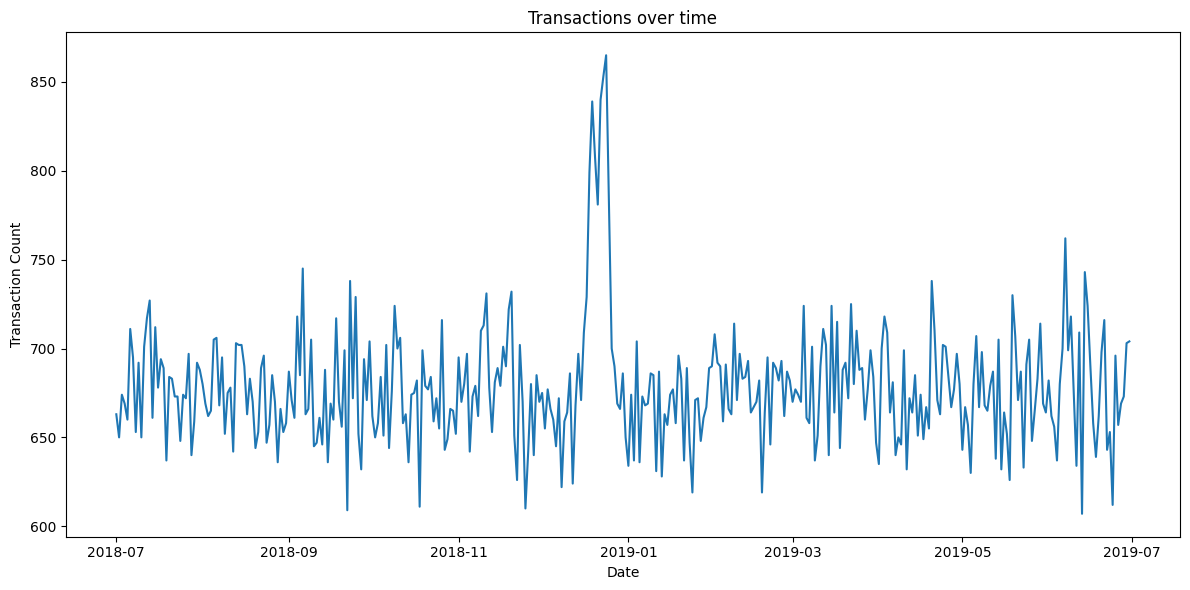

In [207]:
plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date['DATE'], transactions_by_date['TXN_COUNT_BY_DATE'])
plt.title('Transactions over time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

<p>The line graph displays the number of transactions over time, spanning from mid-2018 to mid-2019. The x-axis represents the date, while the y-axis shows the transaction count. The graph captures fluctuations in transaction volume, with noticeable peaks and troughs.</p>

<ul>
<li>Seasonal Trend: There is a significant spike in transactions around the end of 2018 and the beginning of 2019, indicating a potential seasonal effect, likely due to the holiday season. This suggests that the chip category experiences increased demand during this period.</li>
<li>General Variability: The transaction count varies daily, oscillating between approximately 600 and 850 transactions. Such variability could be attributed to factors like promotions, day of the week, or other external influences.</li>
<li>Post-Peak Decline: Following the peak in early 2019, transaction counts decline and then stabilize, indicating the end of the holiday shopping season and a return to normal purchasing behavior.</li>
</ul>

<p>The transaction data reflects clear seasonal patterns, with a pronounced increase in transactions during the holiday season. This insight could guide inventory planning and marketing strategies to capitalize on peak shopping periods.</p>


We can see that there is an increase in purchases in December and a break in late 
December. Let's zoom in on this.

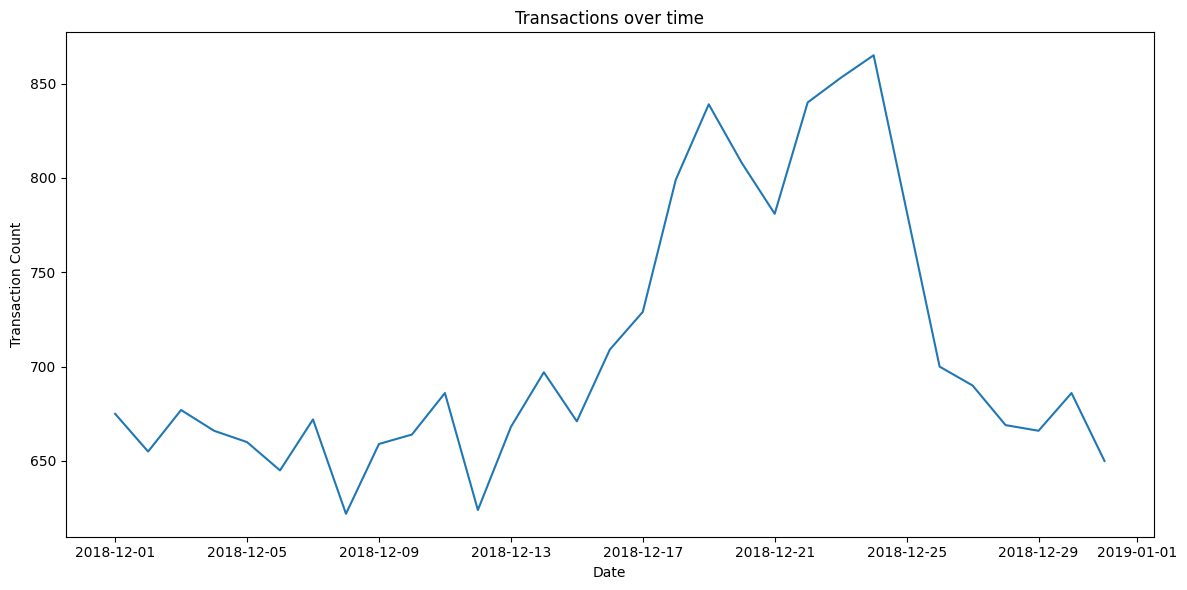

In [208]:
transaction_december = transactions_by_date[transactions_by_date['DATE'].dt.month>11]

plt.figure(figsize=(12, 6))
plt.plot(transaction_december['DATE'], transaction_december['TXN_COUNT_BY_DATE'])
plt.title('Transactions over time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

<p>Analyzing the two graphs provides several key insights into transaction patterns:
</p>
<ul>
<li>Overall Trend:
The first graph shows transaction counts over an entire year, revealing fluctuations but a generally consistent baseline around 650-700 transactions per day. This suggests a stable customer base with regular purchasing habits.</li>

<li>Seasonal Spike:
A significant spike in transactions is evident in December, with the count reaching over 850 transactions on peak days. This aligns with the holiday season, indicating increased chip consumption during festive periods.</li>
<li>December Pattern:
The second graph, focusing on December, shows a clear upward trend as the month progresses. Transaction counts start around 650-700 at the beginning of the month and steadily increase, peaking at over 850 transactions just before Christmas.</li>
<li>Pre-Christmas Peak:
The highest transaction counts occur in the days immediately preceding December 25th (Christmas Day). This suggests last-minute holiday shopping or increased social gatherings where chips are popular.</li>
<li>Post-Christmas Decline:
There's a sharp decline in transactions after December 25th, dropping back to levels seen at the start of the month. This likely reflects reduced shopping activity and social events after the main holiday celebrations.</li>
</ul>


<h4>Pack Size Analysis</h4>

Now that we are satisfied that the data no longer has outliers, we can move on to 
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size

In [209]:
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [210]:
print(transaction_data['PACK_SIZE'].max())
print(transaction_data['PACK_SIZE'].min())

380.0
70.0


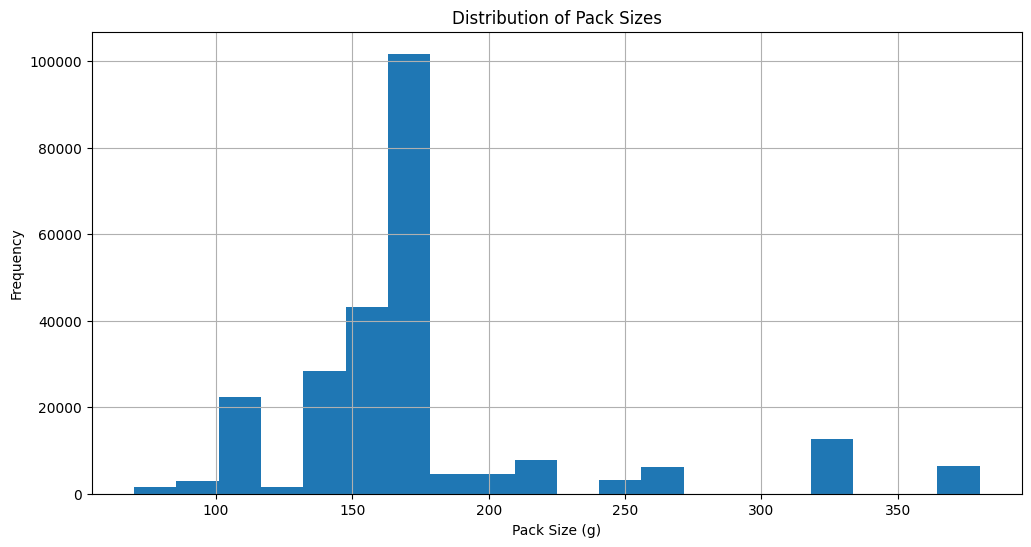

In [211]:
plt.figure(figsize=(12, 6))
transaction_data['PACK_SIZE'].hist(bins=20)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.show()


<h4>Brand Analysis</h4>

Now to create brands, we can use the first word in PROD_NAME to work out the brand 
name

In [212]:
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [213]:
transaction_data['BRAND'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [214]:
brand_replacements = {
    'RED': 'RRD',
    'Red': 'RRD',
    'Snbts': 'Sunbites',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'WW': 'Woolworths',
    'Natural': 'NCC',
    'Grain': 'GrnWves'
}

transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_replacements)

In [215]:
transaction_data['BRAND'].sort_values().unique()

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'GrnWves', 'Infuzions', 'Kettle', 'NCC', 'Pringles',
       'RRD', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'Woolworths'], dtype=object)

<p>After extracting and standardizing brand names from the product names in the transaction data. Here's an interpretation of the steps and findings:</p>

1. Brand Extraction:
   The code extracts the first word from each product name to identify the brand. This assumes that the brand name is consistently the first word in the product description.

2. Initial Brand List:
   The initial extraction reveals a variety of brand names, including some variations and potentially misspelled or abbreviated names.

3. Brand Standardization:
   A dictionary (`brand_replacements`) is created to standardize brand names. This step is crucial for accurate analysis as it:
   - Corrects misspellings (e.g., 'Dorito' to 'Doritos')
   - Standardizes variations (e.g., 'RED' and 'Red' to 'RRD')
   - Expands abbreviations (e.g., 'WW' to 'Woolworths')
   - Corrects for inconsistent naming (e.g., 'Natural' to 'NCC')

4. Final Brand List:
   After standardization, we see a cleaner, more consistent list of brand names. 
   The final list includes 20 unique brands:
   - Burger 
   - CCs 
   - Cheetos 
   - Cheezels 
   - Cobs 
   - Doritos 
   - French 
   - GrnWves 
   - Infuzions 
   - Kettle 
   - NCC 
   - Pringles 
   - RRD, Smiths 
   - Sunbites 
   - Thins 
   - Tostitos 
   - Twisties 
   - Tyrrells 
   - Woolworths.

<p>Key Findings and Implications:</p>

1. Brand Diversity:
   The chip market appears diverse with 20 distinct brands, ranging from well-known international brands to potentially local or store brands.

2. Market Structure:
   The presence of brands like Woolworths suggests that private label products are part of the market mix, competing with established national and international brands.

3. Brand Families:
   Some brands like Doritos, Smiths, and Kettle are prominent enough to be correctly identified from the first word, indicating strong brand recognition.

4. Data Quality Improvement:
   The standardization process significantly improves data quality, enabling more accurate brand-level analysis.

5. Analysis Opportunities:
   With cleaned brand data, it's now possible to conduct meaningful analyses such as:
   - Market share by brand
   - Brand performance trends over time
   - Customer preferences for different brands across segments

6. Marketing Insights:
   Understanding the brand landscape helps in developing targeted marketing strategies and analyzing competitive positioning.

7. Product Portfolio Management:
   For the Category Manager, this provides a clear overview of the brands they're managing, helping in portfolio decisions and negotiations with suppliers.

<p>This brand analysis lays the groundwork for deeper insights into brand performance, consumer preferences, and market dynamics in the chip category.</p>

<h4>Join Transaction and Customer Table</h4>

In [216]:
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

In [217]:
print(data.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


Great, there are no nulls! So all our customers in the transaction data has been 
accounted for in the customer dataset

<h4>Export Processed and Combined Table as CSV</h4>

In [218]:
data.to_csv("combined_data.csv", index=False)

Data exploration is now complete!

<h3>Data analysis on customer segments</h3>

Now that the data is ready for analysis, we can define some metrics of interest to 
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

<h4>Total Sales by Customer Segments</h4>

In [219]:
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
sales_by_segment

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


<Figure size 1200x600 with 0 Axes>

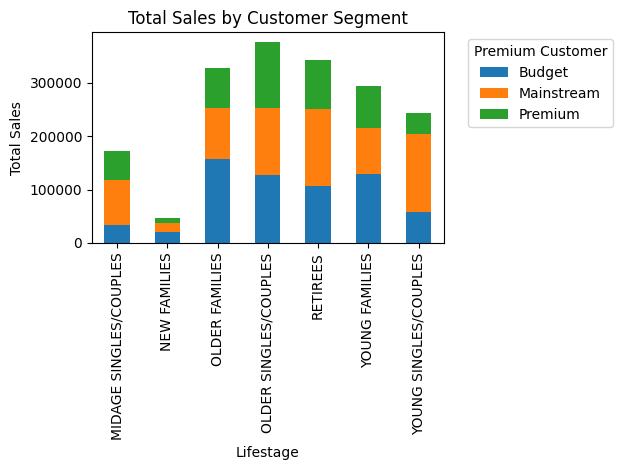

<Figure size 1200x600 with 0 Axes>

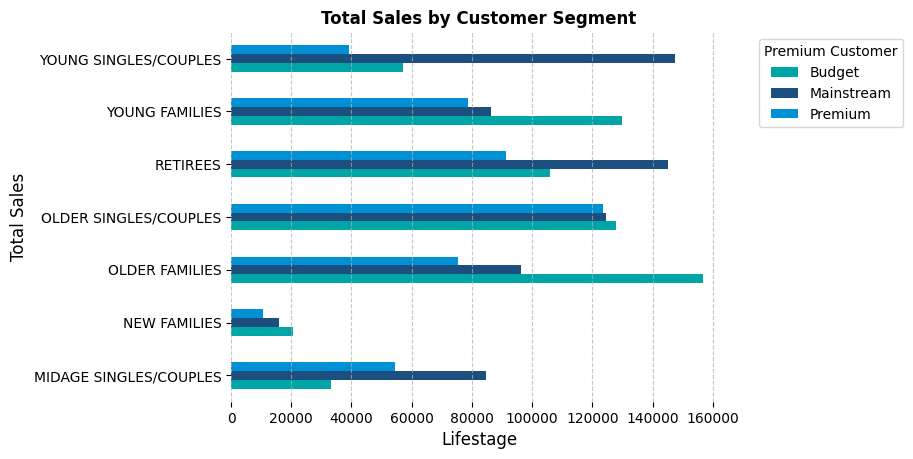

In [220]:
plt.figure(figsize=(12, 6))
sales_by_segment.plot(kind='bar', stacked=True)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

colors = ['#00A6A6', '#1C4E80' , '#0091D5']

plt.figure(figsize=(12, 6))
sales_by_segment.plot(kind='barh', color=colors)
plt.title('Total Sales by Customer Segment', fontweight='bold')
plt.xlabel('Lifestage', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

<p>Sales are coming mainly from Budget - older families, Mainstream - young 
singles/couples, and Mainstream - retirees</p>

<h4>Number of Customers by Segment</h4>

Let's see if the higher sales are due to there being more customers who buy chips.

In [221]:
customers_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()

<Figure size 1200x600 with 0 Axes>

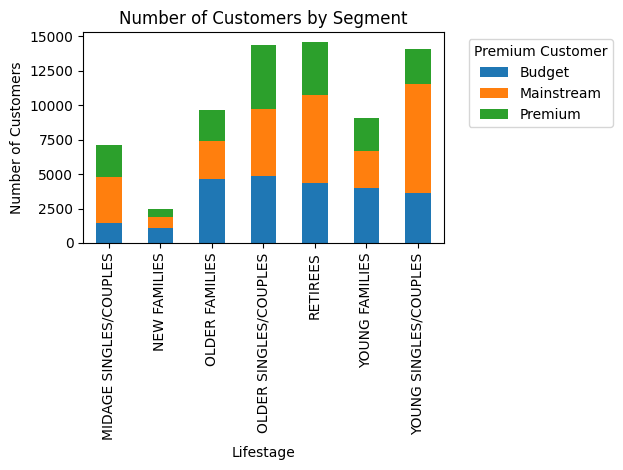

<Figure size 1200x600 with 0 Axes>

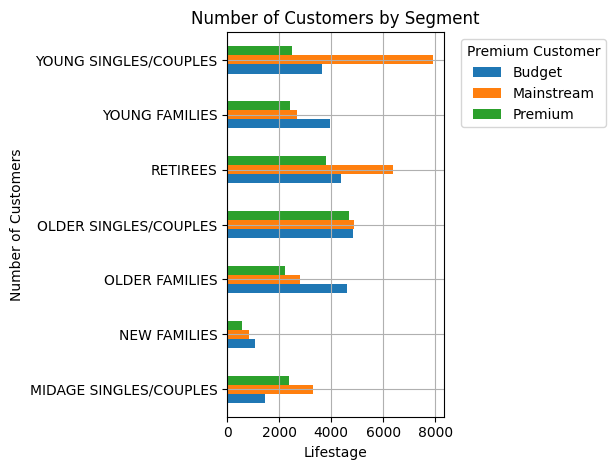

In [222]:
plt.figure(figsize=(12, 6))
customers_by_segment.plot(kind='bar', stacked=True)
plt.title('Number of Customers by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
customers_by_segment.plot(kind='barh', grid=True)
plt.title('Number of Customers by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

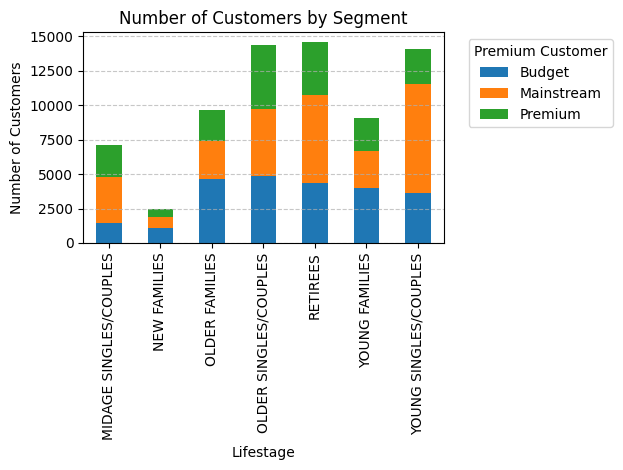

<Figure size 1200x600 with 0 Axes>

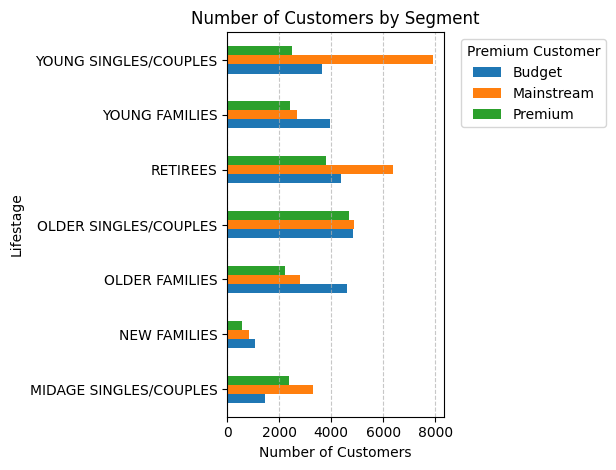

In [223]:
plt.figure(figsize=(12, 6))
customers_by_segment.plot(kind='bar', stacked=True)
plt.title('Number of Customers by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
customers_by_segment.plot(kind='barh')
plt.title('Number of Customers by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p>There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but 
this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer. 
Let's have a look at this next.</p>

<h4>Average Units per Customer by Segment</h4>

In [224]:
units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / customers_by_segment
units_per_customer = units_per_customer.unstack()

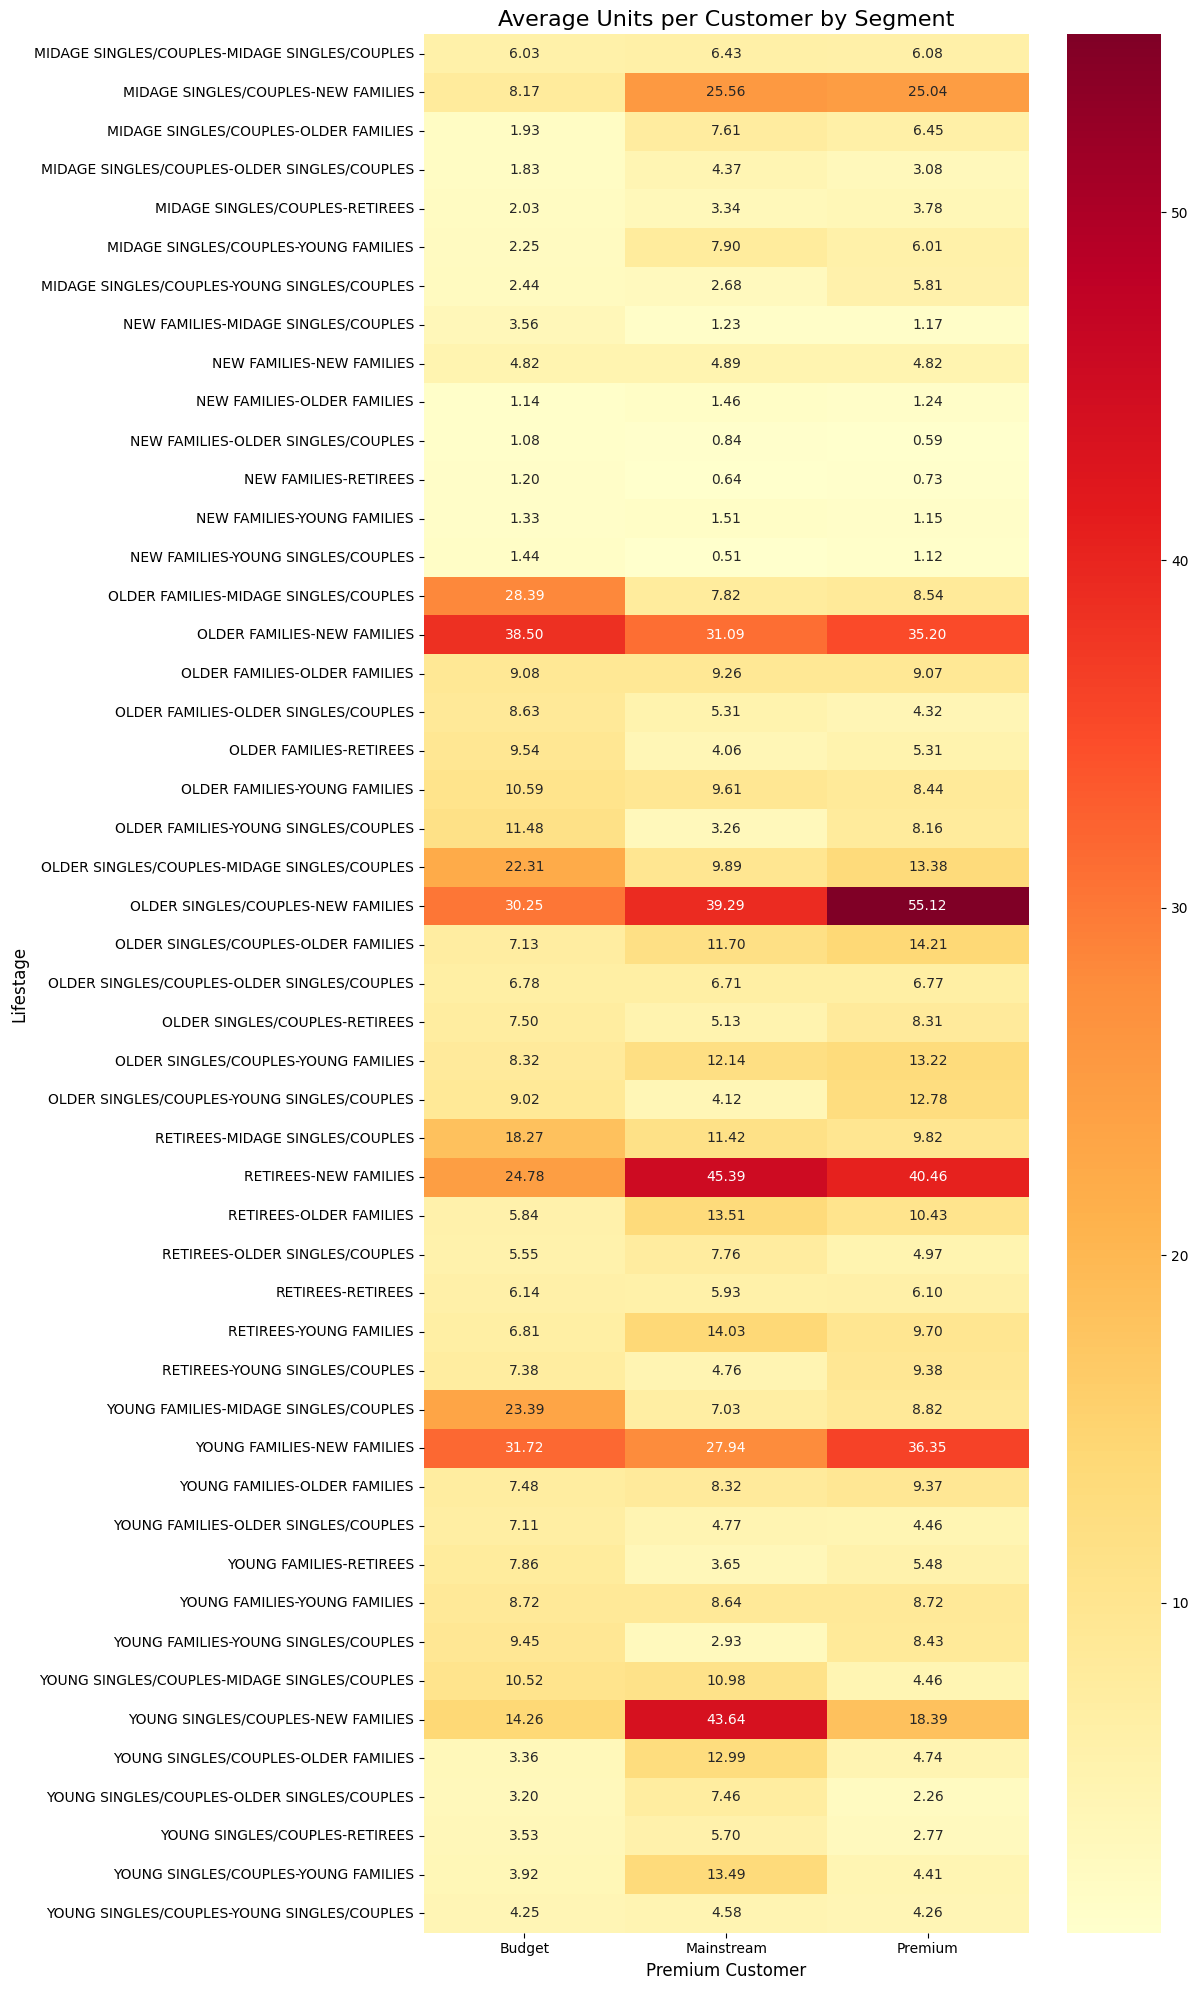

In [225]:

# Reshape the Series into a DataFrame
units_per_customer_reshaped = units_per_customer.unstack(level='PREMIUM_CUSTOMER')

# Check the new shape
# print(units_per_customer_reshaped.shape)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 20))  # Increased height to accommodate all rows

# Create a heatmap
sns.heatmap(units_per_customer_reshaped, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax)

# Set the title and labels
plt.title('Average Units per Customer by Segment', fontsize=16)
plt.xlabel('Premium Customer', fontsize=12)
plt.ylabel('Lifestage', fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer
Let's also investigate the average price per unit chips bought for each customer 
segment as this is also a driver of total sales.

<h4>Average Price per Unit Sold</h4>

In [226]:

avg_price_per_unit = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
avg_price_per_unit = avg_price_per_unit.unstack()
avg_price_per_unit

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.753878,3.994449,3.780823
NEW FAMILIES,3.931969,3.935887,3.886168
OLDER FAMILIES,3.747969,3.736380,3.717703
OLDER SINGLES/COUPLES,3.887529,3.822753,3.897698
RETIREES,3.932731,3.852986,3.924037
YOUNG FAMILIES,3.761903,3.722439,3.759232
YOUNG SINGLES/COUPLES,3.685297,4.074043,3.692889


<Figure size 1200x600 with 0 Axes>

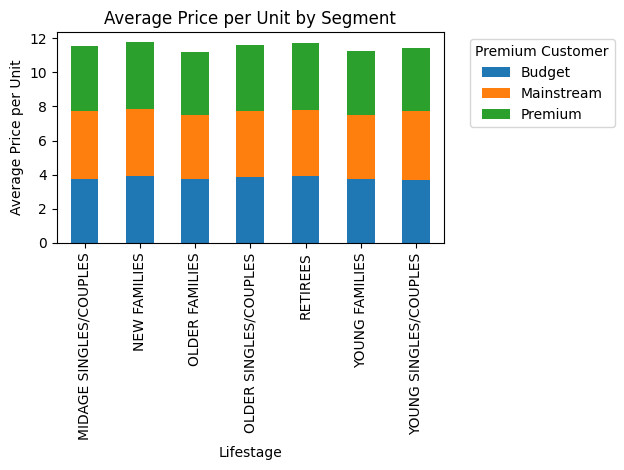

<Figure size 1200x600 with 0 Axes>

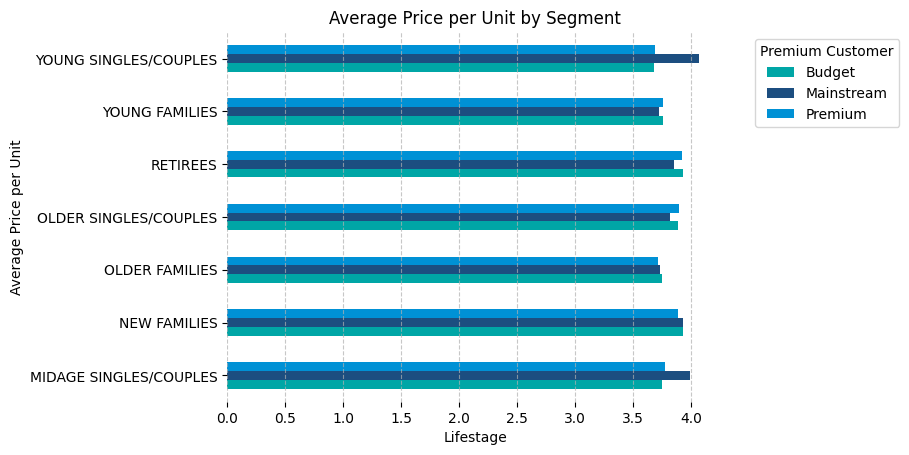

In [227]:
plt.figure(figsize=(12, 6))
avg_price_per_unit.plot(kind='bar', stacked=True)
plt.title('Average Price per Unit by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

colors = ['#00A6A6', '#1C4E80' , '#0091D5']

plt.figure(figsize=(12, 6))
avg_price_per_unit.plot(kind='barh', color=colors)
plt.title('Average Price per Unit by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.show()

<p>Mainstream midage and young singles and couples are more willing to pay more per 
packet of chips compared to their budget and premium counterparts. This may be due 
to premium shoppers being more likely to buy healthy snacks and when they buy 
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and 
couples buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn't large, we can check if this 
difference is statistically different.</p>


<h4>An independent t-test between mainstream vs premium and budget midage 
and young singles and couples</h4>

In [228]:
from scipy import stats

mainstream_price = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                        (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['TOT_SALES'] / \
                   data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                        (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['PROD_QTY']

other_price = data[(data['PREMIUM_CUSTOMER'] != 'Mainstream') & 
                   (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['TOT_SALES'] / \
              data[(data['PREMIUM_CUSTOMER'] != 'Mainstream') & 
                   (data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['PROD_QTY']

t_statistic, p_value = stats.ttest_ind(mainstream_price, other_price)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 37.83196107667815
P-value: 2.235645611549355e-309


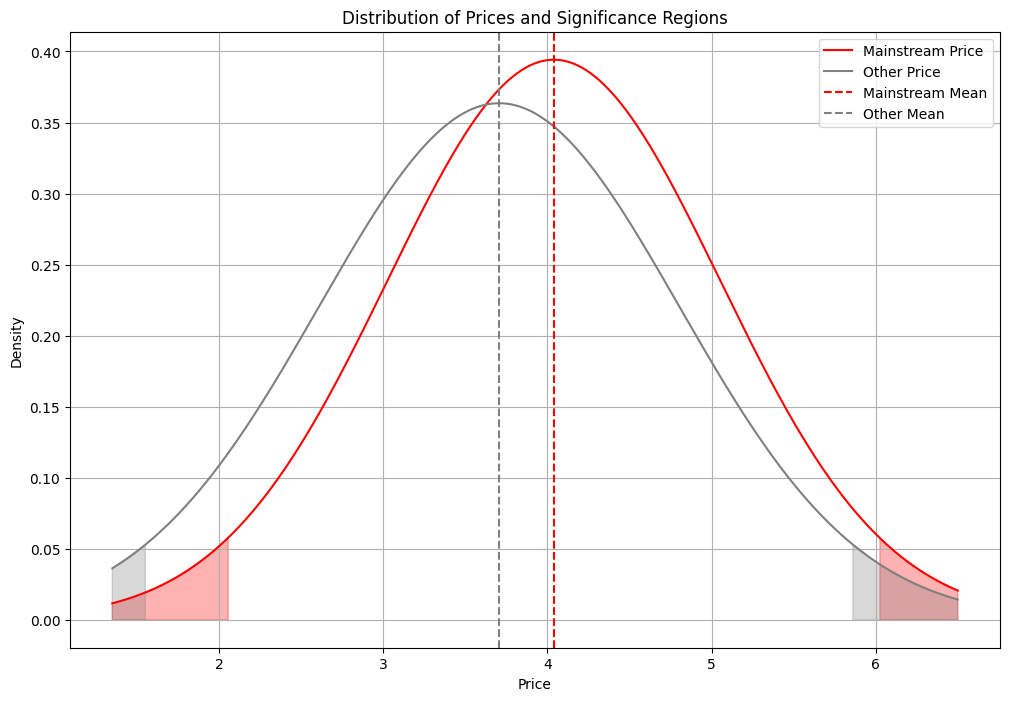

In [229]:
# Mean and Std Dev
import numpy as np
mean_mainstream = mainstream_price.mean()
std_mainstream = mainstream_price.std()
mean_other = other_price.mean()
std_other = other_price.std()

# Generate normal distributions
x = np.linspace(min(mainstream_price.min(), other_price.min()), max(mainstream_price.max(), other_price.max()), 1000)
pdf_mainstream = stats.norm.pdf(x, mean_mainstream, std_mainstream)
pdf_other = stats.norm.pdf(x, mean_other, std_other)

# Determine critical values for significance (two-tailed test)
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)

# Plot distributions
plt.figure(figsize=(12, 8))

# Mainstream Distribution
plt.plot(x, pdf_mainstream, label='Mainstream Price', color='red')
plt.fill_between(x, 0, pdf_mainstream, where=(x >= mean_mainstream + critical_value * std_mainstream) | 
                                              (x <= mean_mainstream - critical_value * std_mainstream), 
                  color='red', alpha=0.3)

# Other Distribution
plt.plot(x, pdf_other, label='Other Price', color='grey')
plt.fill_between(x, 0, pdf_other, where=(x >= mean_other + critical_value * std_other) | 
                                          (x <= mean_other - critical_value * std_other), 
                  color='grey', alpha=0.3)

# Add vertical lines for means
plt.axvline(mean_mainstream, color='red', linestyle='--', label='Mainstream Mean')
plt.axvline(mean_other, color='grey', linestyle='--', label='Other Mean')

# Annotate significance
plt.title('Distribution of Prices and Significance Regions')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


<p><strong>T-statistic: 37.83196107667815</strong>
The t-statistic is quite large (37.83), which indicates a substantial difference between the two groups. In t-tests, the further the t-statistic is from zero, the stronger the evidence that there's a significant difference between the groups.</p>

<p><strong>P-value: 2.235645611549355e-309</strong>
This p-value is extremely small, effectively zero in practical terms. In scientific notation, it's approximately 2.24 x 10^-309, which is incredibly close to zero.</p>

<p><strong>Statistical Significance: </strong>The p-value is much smaller than any conventional significance level (e.g., 0.05, 0.01, or even 0.001). This provides overwhelming evidence to reject the null hypothesis.</p>

<p><strong>Practical Significance: </strong>
The large t-statistic and the extremely small p-value together suggest that there is a highly statistically significant difference in the average prices paid by Mainstream young and midage singles/couples compared to their non-Mainstream counterparts.</p>

<p><strong>Confidence in the Result: </strong>
With a p-value this small, we can be virtually certain that the observed difference between the two groups is not due to random chance.</p>


<p>There is a statistically significant difference in the average price paid per unit between Mainstream young and midage singles/couples and their non-Mainstream counterparts.
The difference is highly unlikely to be due to random chance.
Mainstream young and midage singles/couples are paying significantly different prices compared to non-Mainstream customers in the same age/lifestage groups.</p>

<h4>Deep dive into Mainstream, young singles/couples</h4>

<p>We have found quite a few interesting insights that we can dive deeper into. 
We might want to target customer segments that contribute the most to sales to 
retain them or further increase sales. Let's look at Mainstream - young 
singles/couples. For instance, let's find out if they tend to buy a particular 
brand of chips</p>

In [230]:
target_segment = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
other_segments = data[(data['PREMIUM_CUSTOMER'] != 'Mainstream') | (data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES')]

In [231]:
target_brand_pref = target_segment['BRAND'].value_counts(normalize=True)
other_brand_pref = other_segments['BRAND'].value_counts(normalize=True)

In [232]:
brand_affinity = (target_brand_pref - other_brand_pref) / other_brand_pref


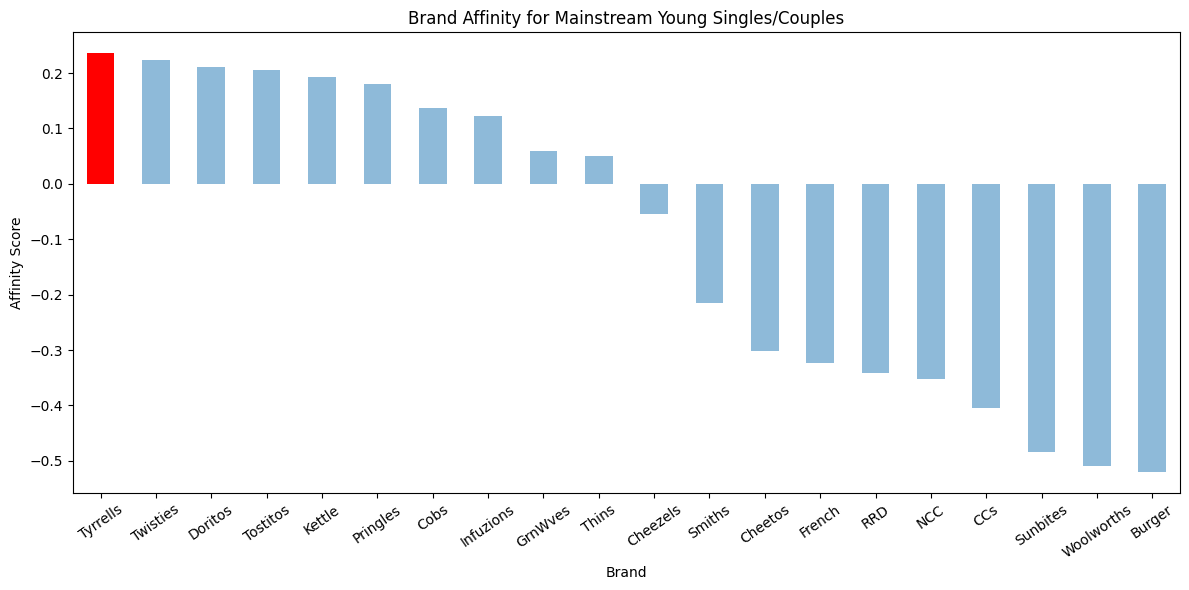

In [241]:
plt.figure(figsize=(12, 6))
bar_plot = brand_affinity.sort_values(ascending=False).plot(kind='bar')
plt.title('Brand Affinity for Mainstream Young Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Affinity Score')

# Get the bars from the plot
bars = bar_plot.patches

# Color the bar with the highest affinity red and dim the rest
max_affinity = brand_affinity.sort_values(ascending=False).iloc[0]
for i, bar in enumerate(bars):
    if i == 0:
        bar.set_facecolor('red')
    else:
        bar.set_alpha(0.5)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

<h4>Brand Affinity Analysis</h4>
The chart illustrates the brand affinity scores for various chip brands among the target segment (Mainstream - young 
singles/couples). 

- **Top Brands**: The brands with the highest affinity scores include Tyrrells, Twists, and Doritos. These brands resonate well with young singles and couples, indicating a strong preference for these products. 
- **Low Affinity Brands**: Conversely, brands like Woolworths and Burger show negative affinity scores, suggesting that they are less favored by this demographic. This insight indicates potential areas for improvement in marketing or product offerings for these brands.

<h4>Preferred pack size compared to the rest of the population</h4>

Let's also find out if our target segment tends to buy larger packs of chips.

In [234]:
target_pack_pref = target_segment['PACK_SIZE'].value_counts(normalize=True)
other_pack_pref = other_segments['PACK_SIZE'].value_counts(normalize=True)
pack_affinity = (target_pack_pref - other_pack_pref) / other_pack_pref


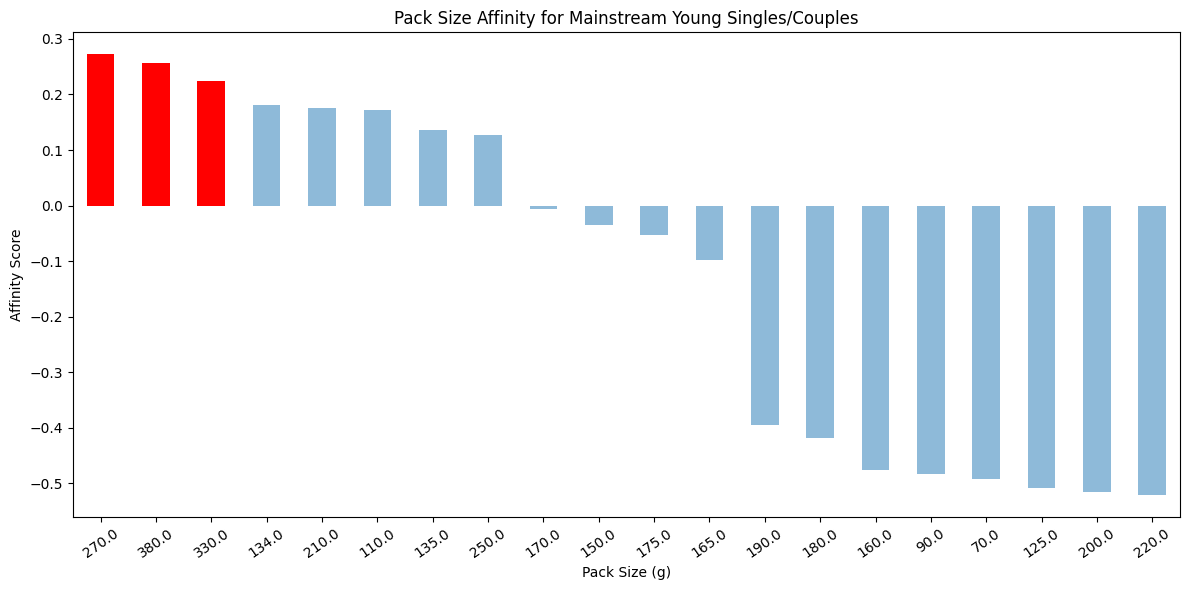

In [243]:
plt.figure(figsize=(12, 6))
bar_plot = pack_affinity.sort_values(ascending=False).plot(kind='bar')
plt.title('Pack Size Affinity for Mainstream Young Singles/Couples')
plt.xlabel('Pack Size (g)')
plt.ylabel('Affinity Score')

# Get the bars from the plot
bars = bar_plot.patches

# Color the first two bars red and dim the rest
for i, bar in enumerate(bars):
    if i < 3:
        bar.set_facecolor('red')
    else:
        bar.set_alpha(0.5)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


This chart presents the affinity scores for different pack sizes of chips.

- **Preferred Pack Sizes**: The most favored pack sizes are around 270g to 380g.
- **Less Favored Pack Sizes**: Larger pack sizes, particularly those above 210g, show negative affinity scores. 

### Strategic Implications
The insights derived from these analyses can significantly inform strategic plan for the chip category:

1. **Focus on Popular Brands**: The Category Manager should prioritize stocking and promoting the top affinity brands, such as Tyrrells and Doritos, to align with customer preferences.
2. **Optimize Pack Sizes**: Offering a variety of pack sizes (270g to 380g) can cater to the preferences of young singles and couples, potentially increasing sales and customer satisfaction.
3. **Marketing Strategies**: Tailored marketing campaigns that highlight the favored brands and pack sizes can enhance engagement with this target segment. 

<h4>KPIs</h4>

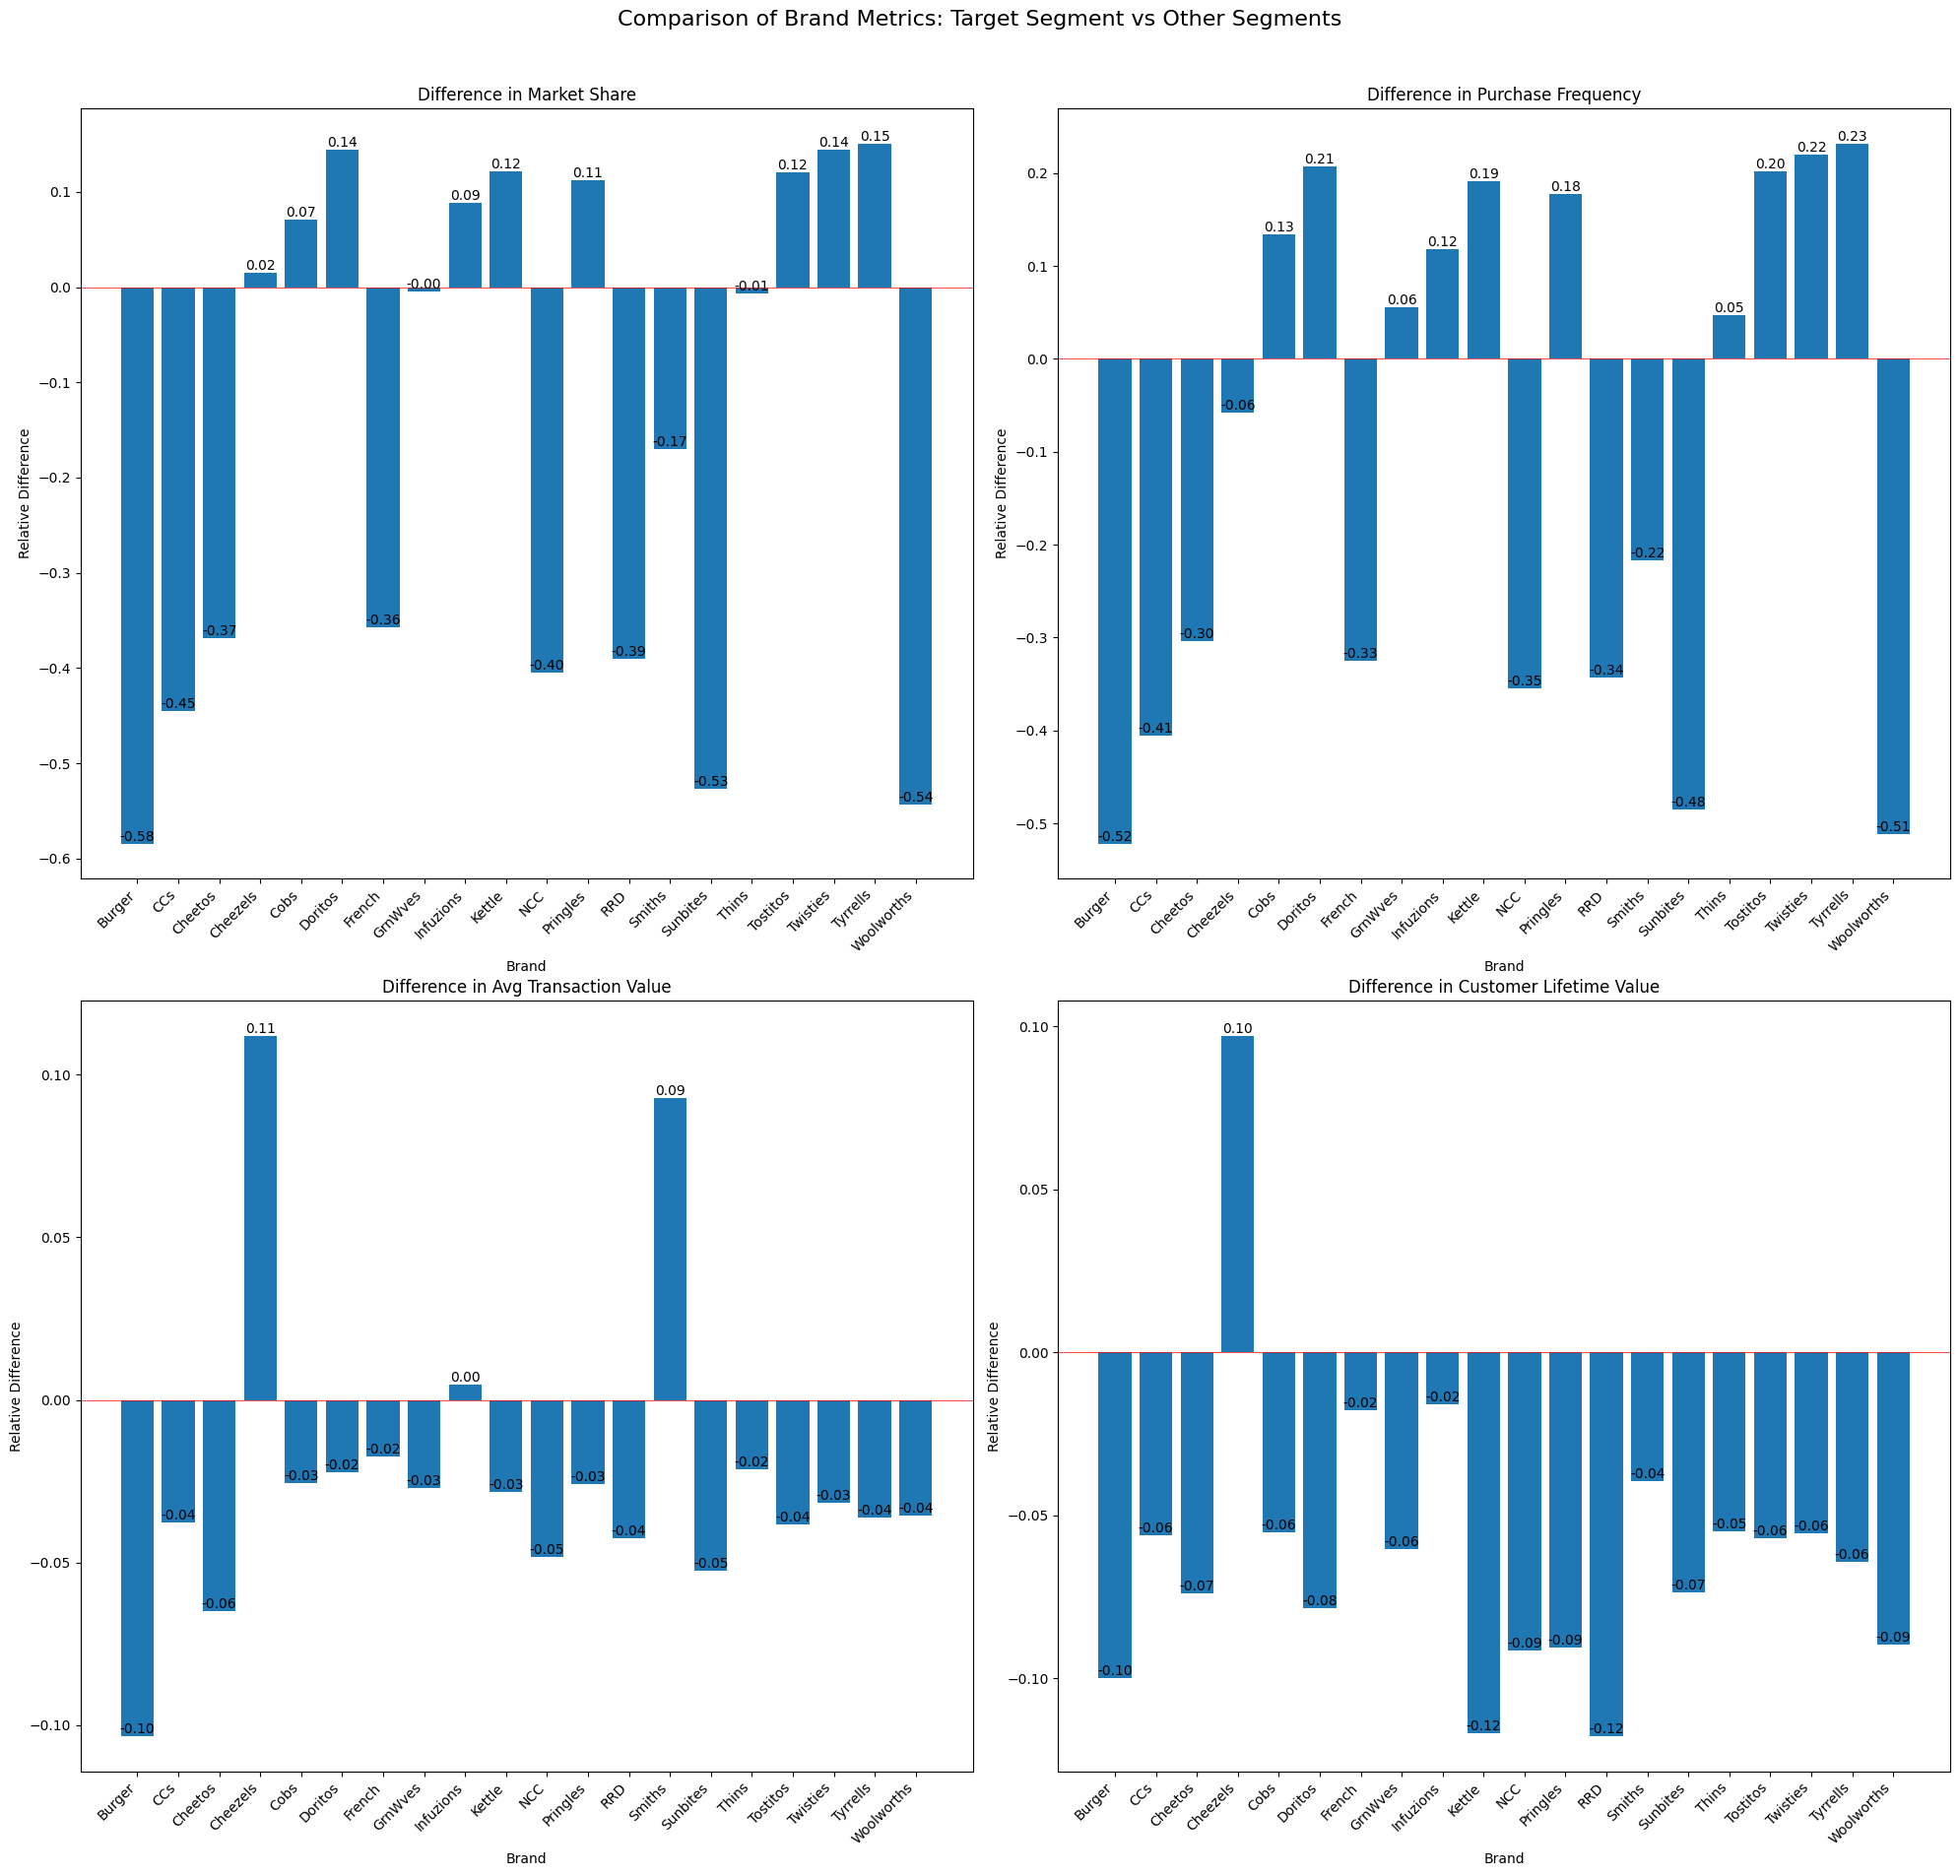

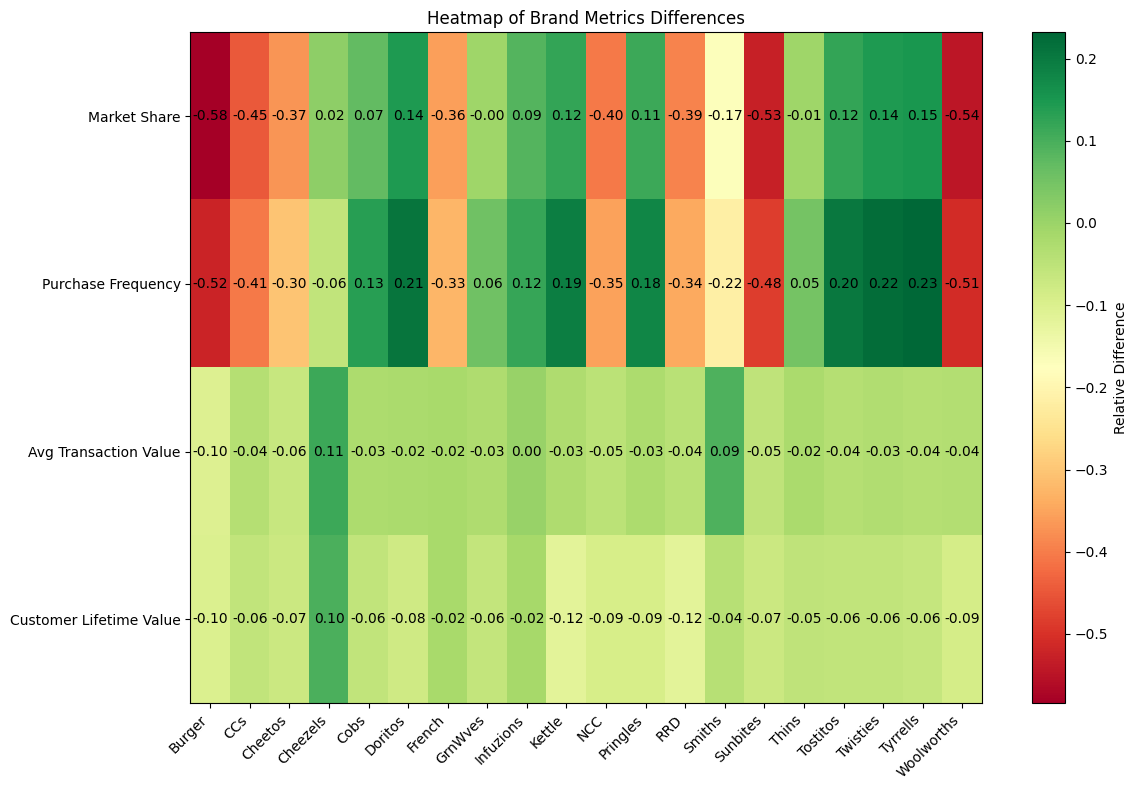

In [236]:
# Additionnal KPIs

metrics = ['Market Share', 'Purchase Frequency', 'Avg Transaction Value', 'Customer Lifetime Value']

def calculate_metrics(df):
    total_sales = df['TOT_SALES'].sum()
    total_transactions = df['TXN_ID'].nunique()
    total_customers = df['LYLTY_CARD_NBR'].nunique()

    market_share = df.groupby('BRAND')['TOT_SALES'].sum() / total_sales
    purchase_freq = df.groupby('BRAND')['TXN_ID'].nunique() / total_transactions
    avg_transaction_value = df.groupby(['TXN_ID', 'BRAND'])['TOT_SALES'].sum().groupby('BRAND').mean()
    customer_lifetime_value = df.groupby(['LYLTY_CARD_NBR', 'BRAND'])['TOT_SALES'].sum().groupby('BRAND').mean()

    return pd.DataFrame({
        'Market Share': market_share,
        'Purchase Frequency': purchase_freq,
        'Avg Transaction Value': avg_transaction_value,
        'Customer Lifetime Value': customer_lifetime_value
    })

target_metrics = calculate_metrics(target_segment)
other_metrics = calculate_metrics(other_segments)

# Calculate the difference (similar to brand affinity)
metrics_diff = (target_metrics - other_metrics) / other_metrics

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Comparison of Brand Metrics: Target Segment vs Other Segments', fontsize=16, y=0.95)

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    
    bars = ax.bar(metrics_diff.index, metrics_diff[metric])
    ax.set_title(f'Difference in {metric}')
    ax.set_xlabel('Brand')
    ax.set_ylabel('Relative Difference')
    
    # Set ticks and tick labels
    ax.set_xticks(range(len(metrics_diff.index)))
    ax.set_xticklabels(metrics_diff.index, rotation=45, ha='right')

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    # Add a horizontal line at y=0
    ax.axhline(y=0, color='r', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjust the top spacing
plt.show()


# Create a heatmap for all metrics
plt.figure(figsize=(12, 8))
plt.imshow(metrics_diff.T, cmap='RdYlGn', aspect='auto')
plt.colorbar(label='Relative Difference')
plt.xticks(range(len(metrics_diff.index)), metrics_diff.index, rotation=45, ha='right')
plt.yticks(range(len(metrics)), metrics)
plt.title('Heatmap of Brand Metrics Differences')

for i in range(len(metrics)):
    for j in range(len(metrics_diff.index)):
        plt.text(j, i, f'{metrics_diff.iloc[j, i]:.2f}', 
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

#### Brand Metrics Comparison

1. **Market Share**:
   - The first chart indicates significant differences in market share between the target segment (young singles and couples) and other segments. Brands like **Tyrrells** and **Doritos** show a positive difference, suggesting they capture a larger share of the market among this segment. In contrast, brands like **Woolworths** and **Burger** exhibit negative differences, indicating lower market share within this segment.

2. **Purchase Frequency**:
   - The purchase frequency metric reveals that brands such as **Tyrrells** and **Doritos** not only have a higher market share but also a higher purchase frequency. This suggests that customers in the target segment are not only buying these brands more often but are also loyal to them. Conversely, brands like **Woolworths** show a negative difference, indicating infrequent purchases.

3. **Average Transaction Value**:
   - The average transaction value analysis shows that brands like **Tyrrells** and **Doritos** have a positive difference, indicating that customers tend to spend more on these brands per transaction. This suggests a willingness to pay a premium for preferred brands. On the other hand, brands like **Burger** and **Woolworths** show negative differences, indicating lower spending.

4. **Customer Lifetime Value**:
   - The customer lifetime value metric indicates that brands such as **Tyrrells** and **Doritos** have a higher lifetime value among the target segment. This suggests that customers are likely to continue purchasing these brands over time, contributing to sustained revenue. Brands with negative differences, like **Woolworths**, indicate lower customer retention and value.

#### Heatmap of Brand Metrics Differences

- The heatmap visually represents the differences in brand metrics across various dimensions. 
- **Market Share**: The heatmap shows that **Tyrrells** and **Doritos** consistently score positively, reinforcing their strong position in the market among the target segment.
- **Purchase Frequency**: The heatmap indicates that the same brands maintain a positive score, suggesting frequent purchases by the target segment.
- **Average Transaction Value**: The heatmap highlights that brands like **Tyrrells** and **Doritos** have a higher average transaction value, while brands like **Woolworths** and **Burger** remain in the negative range.
- **Customer Lifetime Value**: The heatmap confirms that **Tyrrells** and **Doritos** have a higher customer lifetime value, indicating strong brand loyalty and repeat purchases.

### Findings

- **Strong Brand Preference**: The target segment shows a clear preference for brands like **Tyrrells** and **Doritos**, which dominate in market share, purchase frequency, average transaction value, and customer lifetime value.
- **Weak Performance of Certain Brands**: Brands such as **Woolworths** and **Burger** are underperforming in all metrics, indicating a need for strategic reevaluation or marketing efforts to improve their standing.
- **Strategic Recommendations**:
  - Focus on promoting and stocking high-performing brands to align with customer preferences.
  - Consider marketing strategies that enhance brand loyalty and encourage repeat purchases, particularly for the favored brands.
  - Explore opportunities to improve the offerings of underperforming brands to capture a larger share of the target segment.

### Summary

1.  Sales are primarily driven by three customer segments:

- **Budget - Older Families**
- **Mainstream - Young Singles/Couples**
- **Mainstream - Retirees**


2. Mainstream Young Singles/Couples:

- **Contribute significantly to sales**
- **Willing to pay more per packet of chips**
- **Show strong affinity for brands like Tyrrells and Doritos**


3. Pack sizes between 270g and 380g are preferred by the target segment
4. Statistically significant price difference observed between Mainstream and non-Mainstream young and midage singles/couples

These insights will guide the Category Manager's strategic planning for the chip category, ensuring alignment with customer preferences and maximizing sales potential.
